In [236]:
#Importing the Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

# Data Collection and Processing

In [237]:
#Loading the dataset and print
df= pd.read_csv('database_IND.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


Two Prediction are in this dataset one is capacity_mw, and other is primary_fuel.

In [238]:
#No of Rows and Columns
df.shape

(908, 25)

In this data set 908 rows and 25 rows.

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [240]:
#No. of missing values in each column
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

So many missing values are there.Have to drop many columns like country, other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,url,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh,axis=1

In [241]:
df=df.drop(['country','other_fuel1','other_fuel2','other_fuel3','commissioning_year','owner','url','wepp_id','year_of_capacity_data','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_data_source','estimated_generation_gwh'],axis=1)
df.head()

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source
0,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI
2,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,CDM,WRI
3,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI
4,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI


In [242]:
df.shape

(908, 9)

In [243]:
df.isnull().sum()

country_long           0
name                   0
gppd_idnr              0
capacity_mw            0
latitude              46
longitude             46
primary_fuel           0
source                 0
geolocation_source    19
dtype: int64

# Treating missing values

In [244]:
df['latitude']=df['latitude'].fillna(df['latitude'].mean())

In [245]:
df['longitude']=df['longitude'].fillna(df['longitude'].mean())

In [246]:
df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

In [247]:
df.isnull().sum()

country_long          0
name                  0
gppd_idnr             0
capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
source                0
geolocation_source    0
dtype: int64

In [248]:
df['country_long'].value_counts()

India    908
Name: country_long, dtype: int64

In [249]:
df['primary_fuel'].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

In [250]:
df['name'].value_counts()

MOHARA                        1
Sakri 1B Solar Power Plant    1
BOKARO A ''EXP''              1
PANKI                         1
SIMHADRI                      1
                             ..
BHANDARA VARAM                1
TVS Kunnur Wind Farm          1
PONG                          1
BELLARY JANKI                 1
PAINAMPURAM                   1
Name: name, Length: 908, dtype: int64

In [251]:
df.dtypes

country_long           object
name                   object
gppd_idnr              object
capacity_mw           float64
latitude              float64
longitude             float64
primary_fuel           object
source                 object
geolocation_source     object
dtype: object

In [252]:
df.columns

Index(['country_long', 'name', 'gppd_idnr', 'capacity_mw', 'latitude',
       'longitude', 'primary_fuel', 'source', 'geolocation_source'],
      dtype='object')

In [253]:
#Statistical measures
df.describe()

,capacity_mw,latitude,longitude
count,908.000000,908.000000,908.000000
mean,321.046378,21.196189,77.447848
std,580.221767,6.088110,4.781201
min,0.000000,8.168900,68.644700
25%,16.837500,17.057825,74.390250
50%,60.000000,21.278850,76.978950
75%,388.125000,25.183775,79.211600
max,4760.000000,34.649000,95.408000


# When target is capacity_mw

In [254]:
#Check Skewness
df.skew()

capacity_mw    3.193257
latitude      -0.147391
longitude      1.129836
dtype: float64

Target is capacity_mw so we will not remove skewness from target column.

In [255]:
#Remove the Skewness
from scipy.stats import boxcox
df['longitude'] =boxcox(df['longitude'],0)

In [256]:
df.skew()

capacity_mw    3.193257
latitude      -0.147391
longitude      0.921567
dtype: float64

In [257]:
df.corr()

,capacity_mw,latitude,longitude
capacity_mw,1.000000,0.049790,0.201168
latitude,0.049790,1.000000,0.019701
longitude,0.201168,0.019701,1.000000


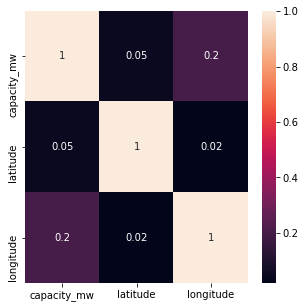

In [258]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True);

Highly -ve corelation between latitude and capacity_mw.

In [259]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['country_long'] = encoder.fit_transform(df['country_long'])
df['name'] = encoder.fit_transform(df['name'])
df['gppd_idnr'] = encoder.fit_transform(df['gppd_idnr'])
df['primary_fuel'] = encoder.fit_transform(df['primary_fuel'])
df['source'] = encoder.fit_transform(df['source'])
df['geolocation_source'] = encoder.fit_transform(df['geolocation_source'])

In [260]:
df.head()

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source
0,0,0,658,2.5,28.1839,4.293751,6,109,1
1,0,1,520,98.0,24.7663,4.312261,1,174,2
2,0,2,854,39.2,21.9038,4.239501,7,21,2
3,0,3,0,135.0,23.8712,4.514810,2,22,2
4,0,4,1,1800.0,21.9603,4.411696,1,22,2


In [261]:
df.dtypes

country_long            int32
name                    int32
gppd_idnr               int32
capacity_mw           float64
latitude              float64
longitude             float64
primary_fuel            int32
source                  int32
geolocation_source      int32
dtype: object

In [262]:
#For unique values
df.nunique()

country_long            1
name                  908
gppd_idnr             908
capacity_mw           365
latitude              838
longitude             829
primary_fuel            8
source                191
geolocation_source      3
dtype: int64

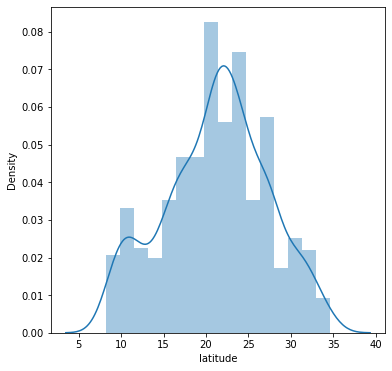

In [263]:
plt.figure(figsize=(6,6))
sns.distplot(df['latitude'])
plt.show()

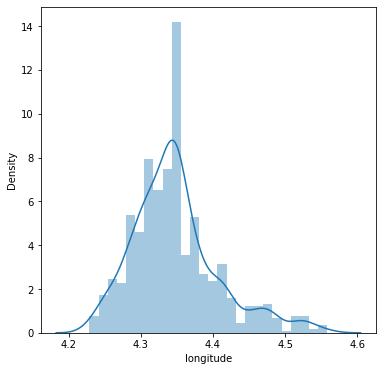

In [264]:
plt.figure(figsize=(6,6))
sns.distplot(df['longitude'])
plt.show()

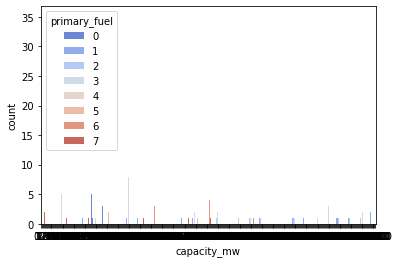

In [265]:
sns.countplot(df['capacity_mw'],palette='coolwarm',hue='primary_fuel',data=df);

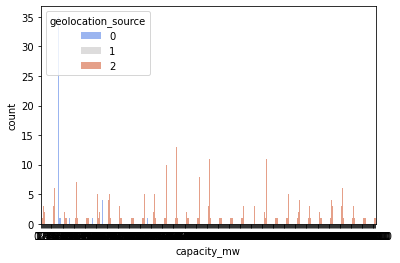

In [266]:
sns.countplot(df['capacity_mw'],palette='coolwarm',hue='geolocation_source',data=df);

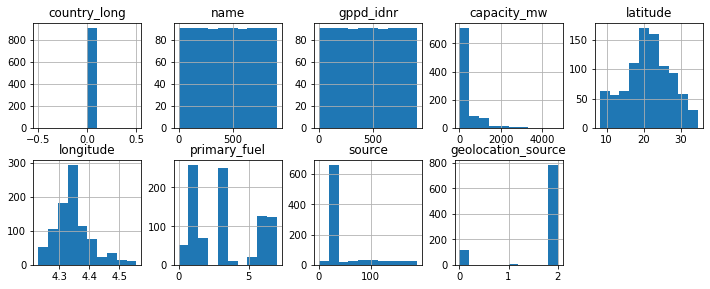

In [267]:
df.hist(figsize=(12,12),layout=(5,5),sharex=False);

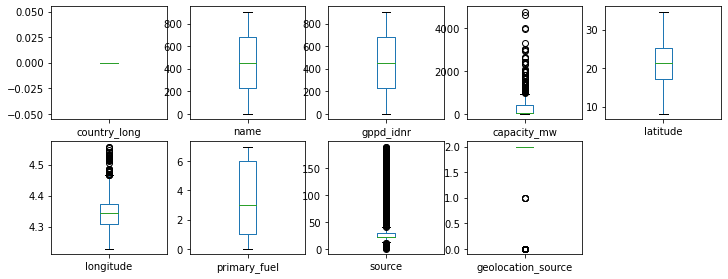

In [268]:
df.plot(kind='box',figsize=(12,12),layout=(5,5),sharex=False,subplots=True);

In [269]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[       nan, 1.73014431, 0.78018635, ..., 1.22541756, 1.461366  ,
        1.08428797],
       [       nan, 1.72632922, 0.25370363, ..., 0.96748576, 2.91878103,
        0.39399052],
       [       nan, 1.72251413, 1.52794443, ..., 1.66399822, 0.51174973,
        0.39399052],
       ...,
       [       nan, 1.72251413, 1.67291793, ..., 1.66399822, 0.51174973,
        0.39399052],
       [       nan, 1.72632922, 0.33000548, ..., 0.96748576, 0.34027752,
        0.39399052],
       [       nan, 1.73014431, 1.61569155, ..., 1.66399822, 0.51174973,
        0.39399052]])

In [270]:
threshold=3
print(np.where(z>3))

(array([ 15,  72,  81, 144, 180, 184, 192, 210, 245, 300, 309, 322, 334,
       341, 346, 361, 364, 365, 376, 417, 428, 483, 494, 495, 520, 639,
       649, 658, 662, 670, 690, 696, 727, 787, 789, 809, 819, 833, 871,
       872, 880, 881, 896, 901], dtype=int64), array([3, 7, 7, 3, 5, 5, 7, 3, 5, 7, 3, 7, 5, 5, 7, 5, 3, 3, 3, 5, 5, 3,
       3, 3, 5, 5, 3, 3, 7, 7, 7, 3, 3, 3, 3, 3, 5, 7, 7, 7, 7, 3, 7, 7],
      dtype=int64))


In [271]:
df_new=df[(z<3).all(axis=1)]

In [272]:
df_new.shape

(0, 9)

Data loss is more so we can not remove outliers.

In [273]:
x= df.drop(['capacity_mw'],axis=1)
y= df['capacity_mw']

In [274]:
#spliting data into training data and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=12)

In [275]:
print(x.shape,x_train.shape,x_test.shape)

(908, 8) (635, 8) (273, 8)


In [276]:
from sklearn.linear_model import LinearRegression

In [277]:
lm= LinearRegression()
model = lm.fit(x_train,y_train)

In [278]:
lm.coef_

array([   0.        ,    0.22959265,   -0.21245646,    4.11915225,
       -126.47982143,  -98.64050409,   -3.44964228, -145.59664128])

In [279]:
lm.intercept_

1495.019860267223

In [280]:
pred=lm.predict(x_test)

In [281]:
lm.score(x_train,y_train)

0.22026035826249912

# Regularization

In [282]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [283]:
from sklearn.linear_model import Lasso

parameters ={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [284]:
from sklearn.metrics import mean_squared_error,r2_score
print(mean_squared_error(pred,y_test))

274085.45902855473


In [285]:
ls = Lasso(alpha=10,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

lss = r2_score(y_test,pred_ls)
lss

0.20831033988307057

# Ensemble Technique

In [286]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state =0, max_depth =5)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [287]:
dt.score(x_train,y_train)

0.6515663272855327

In [288]:
predictions = dt.predict(x_test)

In [289]:
dtscore = cross_val_score(dt,x,y,cv=5)
dtc=dtscore.mean()
print('Cross Val Score:',dtc*100)

Cross Val Score: 20.61568389574609


# Hyper Parameter tuning

In [290]:
from sklearn.model_selection import GridSearchCV
parameter ={'max_depth':np.arange(2,10),
           'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
           'splitter':['best','random'],
           'max_features':['auto','sqrt','log2']}

In [291]:
GCV=GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)

In [292]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [293]:
GCV

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [294]:
GCV.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 3,
 'max_features': 'auto',
 'splitter': 'best'}

In [295]:
import pickle
filename ='Global Power Plant.pkl'
pickle.dump(dt,open(filename,'wb'))

In [296]:
loaded_model = pickle.load(open('Global Power Plant.pkl','rb'))

# Consider target is primary_fuel solve by Using classification

In [297]:
x = df.drop(['primary_fuel'],axis=1)
y = df['primary_fuel']

In [298]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [299]:
print(x.shape,x_train.shape,x_test.shape)

(908, 8) (681, 8) (227, 8)


# Training the model

In [311]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [312]:
lr = LogisticRegression()
model = lr.fit(x_train,y_train)
prediction = model.predict(x_test)

print('Acc on training data:{:,.3f}'.format(lr.score(x_train,y_train)))
print('Acc on test data:{:,.3f}'.format(lr.score(x_test,y_test)))

Acc on training data:0.689
Acc on test data:0.683


In [303]:
#Random Forest Classifier model
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
pred = rfc.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.67      0.86      0.75         7
           1       0.78      0.88      0.83        69
           2       0.77      0.43      0.56        23
           3       0.81      0.88      0.85        68
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         8
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        29

    accuracy                           0.83       227
   macro avg       0.63      0.63      0.62       227
weighted avg       0.81      0.83      0.81       227



In [305]:
#Support Vector Machine Model
from sklearn import svm
SVM = svm.SVC(kernel='linear')

In [306]:
#Training the SVM
SVM.fit(x_train,y_train)

SVC(kernel='linear')

In [307]:
#Accuracy score on training data
x_train_prediction = SVM.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.67      0.86      0.75         7
           1       0.78      0.88      0.83        69
           2       0.77      0.43      0.56        23
           3       0.81      0.88      0.85        68
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         8
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        29

    accuracy                           0.83       227
   macro avg       0.63      0.63      0.62       227
weighted avg       0.81      0.83      0.81       227



In [308]:
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.7870778267254038


In [309]:
#KNeighborsClassifier model
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.25      0.86      0.39         7
           1       0.68      0.71      0.70        69
           2       0.50      0.17      0.26        23
           3       0.79      0.79      0.79        68
           5       0.00      0.00      0.00         8
           6       0.88      0.96      0.92        23
           7       0.93      0.97      0.95        29

    accuracy                           0.72       227
   macro avg       0.58      0.64      0.57       227
weighted avg       0.71      0.72      0.70       227



In [310]:
from sklearn.model_selection import cross_val_score

In [313]:
#Cross val score of lr
print(cross_val_score(lr,x,y,cv=5).mean())

0.6740574342784289


In [314]:
#cross val score of rfc
print(cross_val_score(rfc,x,y,cv=5).mean())

0.8193370165745856


In [315]:
#cross val score of knn
print(cross_val_score(knn,x,y,cv=5).mean())

0.6102361726671119


least difference of cross val and accuracy in Random Forest Classifier. so our best model is Random Forest Classifier.

# Hyper parameter tuning

In [319]:
from sklearn.model_selection import GridSearchCV

In [320]:
#finding best parameter for rfc
parameter ={'max_depth':np.arange(2,10),
           'criterion':['gini','entropy'],
           'max_leaf_nodes':np.arange(2,10),
           'max_features':['auto','sqrt','log2']}

In [322]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [323]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [324]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'sqrt',
 'max_leaf_nodes': 9}

In [326]:
#Final_mod
Final_mod = RandomForestClassifier(criterion='entropy',max_depth=9,max_features='sqrt',max_leaf_nodes=9)
Final_mod.fit(x_train,y_train)
pred= Final_mod.predict(x_test)
acc= accuracy_score(y_test,pred)
print(acc*100)

76.65198237885463


In [327]:
#Accuracy score on test data
x_test_prediction = rfc.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction,y_test)

In [328]:
print('Accuracy on test data:',test_data_accuracy)

Accuracy on test data: 0.8325991189427313


# Saving the model

In [336]:
import joblib
joblib.dump(Final_mod,'Global Power Plant_Prediction.pkl')

['Global Power Plant_Prediction.pkl']

# Loading the model

In [338]:
loaded_model = joblib.load(open('Global Power Plant_Prediction.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.7665198237885462
